In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math


### Задача 4
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

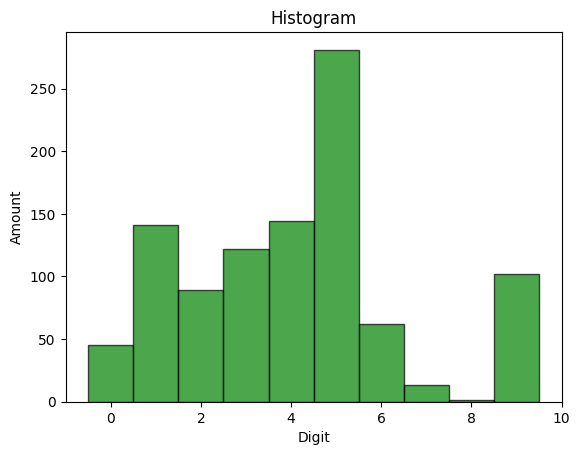

In [26]:
d = np.arange(10)
w = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]
w /= np.sum(w)
sd = np.argsort(w)
sw = np.array(w)[sd]
sample = np.random.choice(np.arange(10), size=1000, p=w)

plt.hist(sample, bins=np.arange(11) - 0.5, edgecolor='black', alpha=0.7, color='Green')
plt.title('Histogram')
plt.xlabel('Digit')
plt.ylabel('Amount')
plt.show()


### Задача 5
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$ с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

$$F^{-1}(x)=\frac{\ln(1-x)}{-\lambda}$$

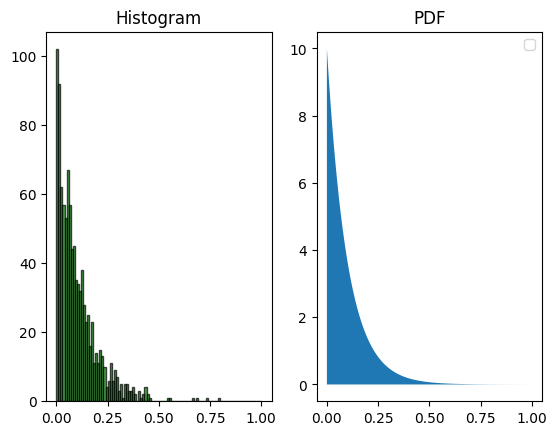

<Figure size 640x480 with 0 Axes>

In [61]:
usample = np.random.uniform(0, 1, 1000)
L=10 #value of lyambda
usample = -np.log(1 - usample)/L

plt.subplot(1, 2, 1)
plt.hist(usample, bins=100, range=(0,1), edgecolor='black', alpha=0.7, color='Green')
plt.title('Histogram')

plt.subplot(1, 2, 2)
x = np.linspace(0, 1, 1000)
y = L * np.exp(-L * x)
#plt.plot(x, y, label=f'Exp({L}) PDF')
plt.fill_between(x, 0, y)
plt.title('PDF')
plt.legend()
plt.show()

plt.tight_layout()
plt.show()

#np.log([1, np.e, np.e**2, 0])

### Задача 6
Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из распределения с плотностью $e^xcos^2x$ на отрезке $[-\pi/2, \pi/2]$. По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

$$ \int_{-\frac{\pi}{2}}^{\frac{\pi}{2}}e^x cos^2(x) dx = \frac{4}{5} sinh(\frac{\pi}{2})$$

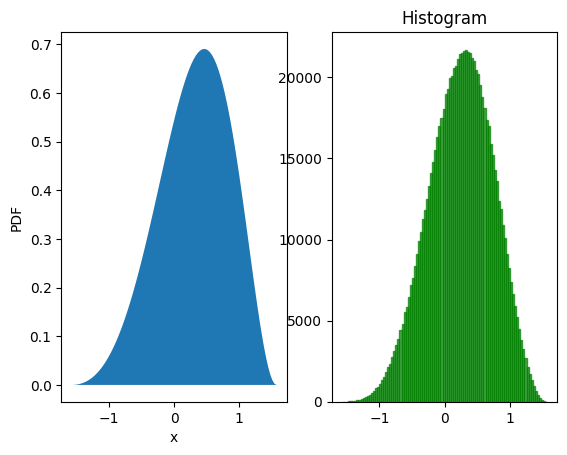

In [84]:
def ajmethod(size):
  osample = []
  while len(osample) < size:
    px = np.random.normal(loc=0.0, scale=1.0, size = 1)[0]*2.2
    y =  np.random.uniform(0, 2.2/np.sqrt(2*np.pi)*np.exp(((px)**2)/2), 1)[0]
    if y <= np.exp(px)*np.cos(px)**2/c:
      osample.append(px)
  return np.array(osample)

c = 4/5*np.sinh(np.pi/2)

plt.subplot(1, 2, 1)
x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x)*np.cos(x)**2/c
plt.fill_between(x, 0, density)
plt.ylabel('PDF')
plt.xlabel('x')


plt.subplot(1, 2, 2)


#коэффицент подобран так чтобы наше распределение лежало полностью
#под этим ненормированным нормальным
plt.hist(ajmethod(1000000), bins=100, range=(-np.pi/2,np.pi/2), edgecolor='green', alpha=0.7, color='Green')
plt.title('Histogram')
plt.show()

### Задача 7
Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

area $=14.5 =\frac{29}{2}$

<ipython-input-115-4ba89e4abed9>:9: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)


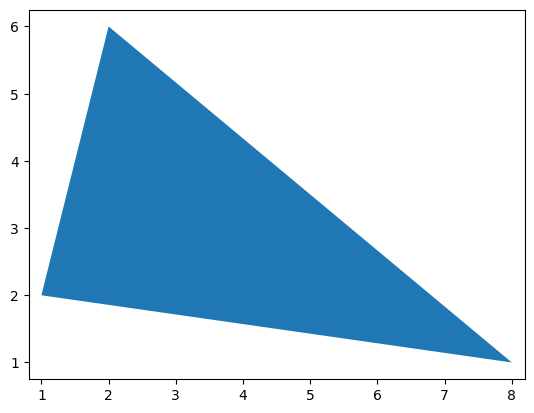

[[1 2 8]
 [2 6 1]
 [1 1 1]]
[[0 0 1]
 [1 0 0]
 [1 1 1]]
[[ 0.  1.  0.]
 [-1. -1.  1.]
 [ 1.  0.  0.]]


<ipython-input-115-4ba89e4abed9>:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  aa, ab = np.matmul(affmat, [a, b, c])[0], np.matmul(affmat, [a, b, c])[1]


<function matplotlib.pyplot.show(close=None, block=None)>

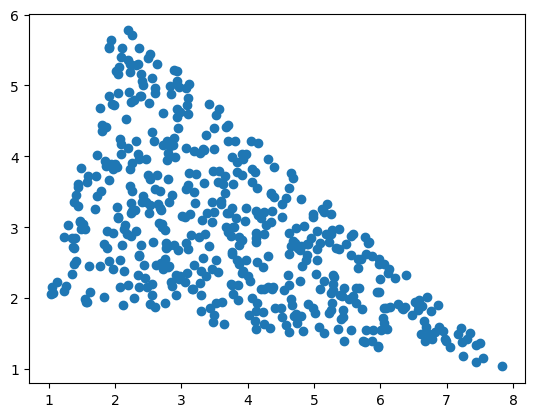

In [115]:
from os import symlink
%matplotlib inline
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

def mkpntsintrng(size, a): #генерирует точки в прямойгольном треугольнике в начале координат с катетами а
  sx = []
  sy = []
  while len(sx) < size:
    x = np.random.uniform(0, a, 1)
    y = np.random.uniform(0, a, 1)
    if x+y<=a:
      px,py = x,y
      sx.append(px)
      sy.append(py)
    else:
      px,py = 1-x,1-y
      sx.append(px)
      sy.append(py)
  return sx,sy

def affdef(pointbef, pointaft):
  a = np.array([pointaft[0][0], pointaft[1][0], pointaft[2][0], pointaft[0][1], pointaft[1][1], pointaft[2][1], 1, 1, 1]).reshape(3,3)
  b = np.array([pointbef[0][0], pointbef[1][0], pointbef[2][0], pointbef[0][1], pointbef[1][1], pointbef[2][1], 1, 1, 1]).reshape(3,3)
  print(a)
  print(b)
  ib = np.linalg.inv(b)
  print(ib)
  return np.matmul(a, ib)

a, b = mkpntsintrng(500, 1)
c = np.ones(500)

bef = [[0, 1], [0, 0], [1, 0]]
aft = [[1, 2], [2, 6], [8, 1]]
affmat = affdef(bef, aft)

aa, ab = np.matmul(affmat, [a, b, c])[0], np.matmul(affmat, [a, b, c])[1]

plt.scatter(aa,ab)
plt.show

### Задача 8
Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

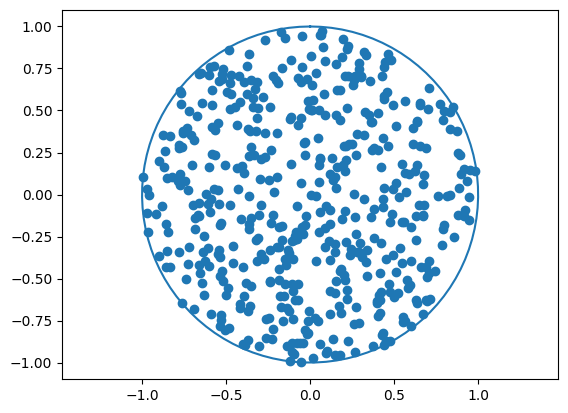

In [93]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')


phi = np.random.uniform(0, 2*np.pi, 500)
r = np.sqrt(np.random.uniform(0, 1, 500))
x,y = r*np.cos(phi), r*np.sin(phi)

plt.scatter(x,y)
plt.show()

### Задача 9
Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20,  -4],
       [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

4.0053654718449385 6.996136270812021
4 7
[[20.04048668 -4.03656114]
 [-4.03656114 40.29735339]]
[[20 -4]
 [-4 40]]


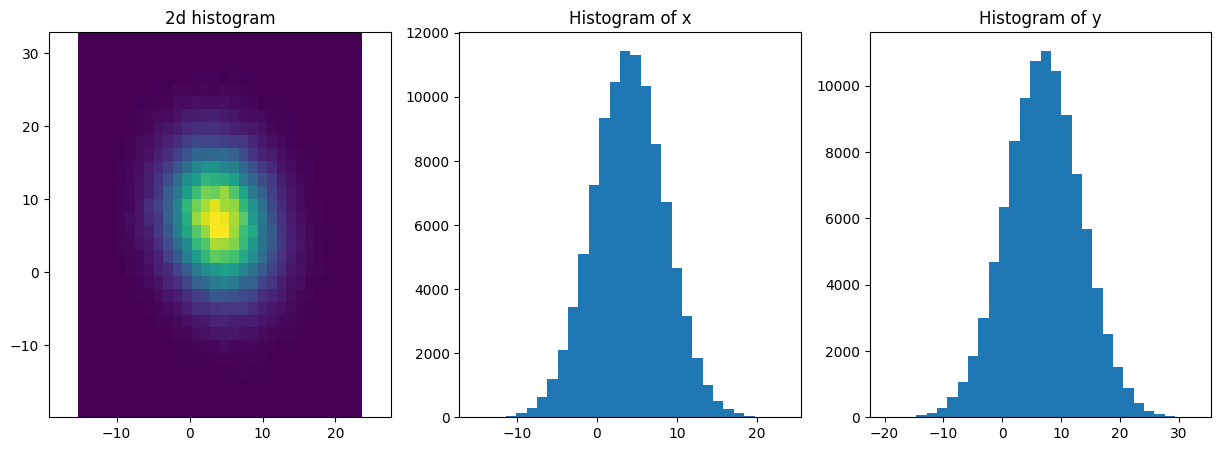

In [56]:
%matplotlib inline
def BMalg(n):

  a = []
  b = []
  while len(a) < n:
    x = np.random.uniform(-1, 1, 1)
    y = np.random.uniform(-1, 1, 1)
    s = x**2+y**2
    if 0<s<=1:
      pa = x*np.sqrt(-2*np.log(s)/s)
      pb = y*np.sqrt(-2*np.log(s)/s)
      a.append(pa[0])
      b.append(pb[0])
  return np.array(a),np.array(b)


ma = np.zeros(100000)
mb = np.zeros(100000)
ma, mb = BMalg(100000)

B = [[20, -4], [ -4, 40]]
m = [4, 7]
L = np.linalg.cholesky(B)

#print(L)

G = np.array([L[0][0],L[0][1],4,L[1][0],L[1][1],7,0,0,1]).reshape(3,3)
c = np.ones(100000)
aa, ab = np.matmul(G, [ma, mb, c])[0], np.matmul(G, [ma, mb, c])[1]
#print(G)

meana, meanb = np.mean(aa), np.mean(ab)
print(meana, meanb)
print(4, 7)

covar = np.cov(aa,ab)
print(covar)
print(np.array(B).reshape(2,2))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(aa, ab, bins=30)
ax[0].axis('equal')
ax[1].hist(aa, bins=30)
ax[2].hist(ab, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()